In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [4]:
train_data_notrans = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=None
)

In [13]:
train_data.data.shape, \
train_data_notrans.data.shape

(torch.Size([60000, 28, 28]), torch.Size([60000, 28, 28]))

In [12]:
train_data.data.equal(train_data_notrans.data)

True

### Notes

- Q. What's `transform` for!
- A. Change PIL image to tensor, apply lambda, etc. (I think those are the key ones)

### Visualization

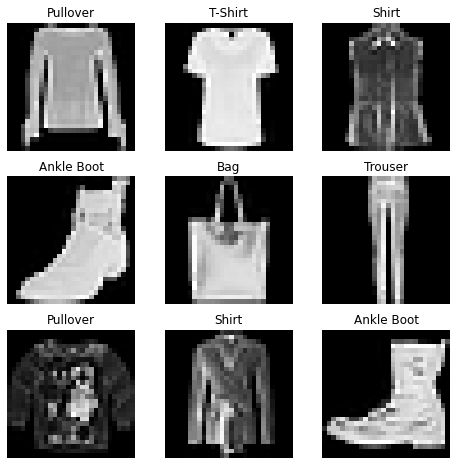

In [18]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
axes = figure.subplots(3, 3).flatten()
for i, ax in enumerate(axes):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    ax.set_title(labels_map[label])
    ax.axis("off")
    ax.imshow(img.squeeze(), cmap="gray")
plt.show()

## Custom Dataset!

Very similar to Keras DataGenerator, need to implement `init`, `len`, `getitem` (`__`).

In [19]:
import os
import pandas as pd
from torchvision.io import read_image

In [22]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, image_dir, transform=None, target_transform=None):
        self.image_labels = pd.read_csv(annotations_file)  # path, label
        self.image_dir = image_dir
        self.transform = transform
        self.target_transfrom = target_transform
    
    def __len__(self):
        return len(self.image_labels)
    
    def __getitem__(self, idx):
        path, label = self.image_labels.iloc[idx]
        image_path = os.path.join(self.image_dir, self.image_labels.iloc[idx, 0])
        image = read_image(image_path)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transfrom(label)
            
        return {"image": image, "label": label}  # why this format

## DataLoaders

In [24]:
from torch.utils.data import DataLoader

In [25]:
train_loader = DataLoader(train_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

In [34]:
train_loader

In [39]:
train_loader.__iter__().__next__()[0].shape, \
train_loader.__iter__().__next__()[1].shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

Ankle Boot


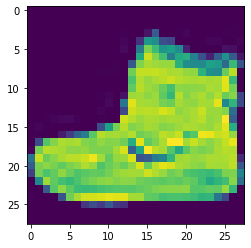

In [42]:
for i, (x, y) in enumerate(train_loader):
    x, y = x[0], y[0]  # first in batch
    plt.imshow(x[0])
    print(labels_map[y.item()])
    break